# Normal density recovery using FFT

We take the characteristic function of the N($\mu,\sigma^2$)  
$\phi_X(u) = exp(i\mu u - \frac{1}{2}\sigma^2 u^2)$  
  
We then compare the original PDF $f_X$ with the FFT approximation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import scipy.fft as fft
import scipy.interpolate as interpolate


In [8]:
def RecoveryDensity( cf, x, N = 8192):
    # assigning i = sqrt(-1)
    i = np.complex(0,1)
    
    # specification of the grid for u
    u_max = 20
    du = u_max / N
    u = np.linspace(0, N-1, N) * du
    
    # grid for x
    b   = np.min(x)
    # dx*du = 2pi/N
    dx  = 2 * np.pi / (N*du) 
    x_i = b + np.linspace(0, N-1, N) * dx
    
    # ChF
    phi = np.exp(-i*b*u) * cf(u)
    
    # Boundary points
    gamma_1 = np.exp(-i*x_i*u[0]) * cf(u[0])
    gamma_2 = np.exp(-i*x_i*u[-1]) * cf(u[-1])
    phi_boundary = 0.5 * (gamma_1 + gamma_2)
    
    # FFT : the part exp(-i2pi/N * (n-1)(k-1) is in fft)
    # We perform FFT on N grid points of x_i, but if input x has point not in the grid
    # these will be performed by interpolation.
    # Or if x has millions point it will be performed by interpolation
    f_xi = du/np.pi * np.real(fft.fft(phi) - phi_boundary)
    
    # Interpolation
    f_xiInterp = interpolate.interp1d(x_i, f_xi, kind = 'cubic')
    
    return f_xiInterp(x)
    

In [10]:
def mainCalculation():
    i = np.complex(0, 1)
    
    # setting for normal distribution
    mu    = 0
    sigma = 1
    
    # Define characteristic function for the normal distribution
    cF = lambda u: np.exp(i * mu * u - 0.5 * sigma ** 2 *u**2)
    
    # define domain for density
    x = np.linspace(-8, 8, 100)
    f_XExact = st.norm.pdf(x, mu, sigma)
    
    # Recovered Density
    f_XR = RecoveryDensity(cF,x)
    
    plt.figure(1)
    plt.grid()
    plt.xlabel("x")
    plt.ylabel("$f_X(x)$")
    plt.plot(x, f_XExact, '-r')
    plt.plot(x, f_XR, '--b')
    plt.legend(['Exact PDF', 'Approximated PDF'])
    

C:\Users\NGUYEN Xuan Vinh\AppData\Local\Temp\ipykernel_11676\3940198881.py:2: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  i = np.complex(0, 1)
C:\Users\NGUYEN Xuan Vinh\AppData\Local\Temp\ipykernel_11676\2292158480.py:3: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  i = np.complex(0,1)


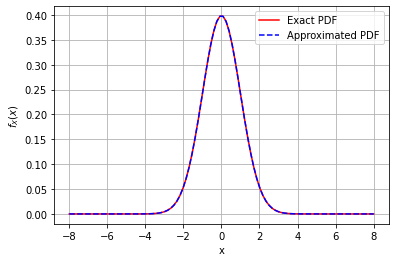

In [11]:
mainCalculation()